# Introduction to Carbonate Chemistry

First things first, let's install a package for carbonate chemistry calculations (pyCO2SYS) as well as load some other packages we will need.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Colab Notebooks/PaleoCAMP_Jacobel/Day 6/Modern/PyCO2sys2.ipynb' # we should see the Jupyter notebook (.ipynb) and the netCDF data file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/MyDrive/Colab Notebooks/PaleoCAMP_Jacobel/Day 6/Modern/PyCO2sys2.ipynb'


In [ ]:
pip install PyCO2SYS # for carbonate chemistry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np                    # for math
import pandas as pd                   # for database organization
from scipy import stats, optimize     # for solving non-linear equations
from matplotlib import pyplot as plt  # for making plots
import PyCO2SYS as pyco2              # for carbonate calculations

In [ ]:
pyco2.hello() # this just checks to make sure that the package runs + easter egg


               M.P. Humphreys, A.J. Schiller, D.E. Sandborn,
                L. Gregor, D. Pierrot, S.M.A.C. van Heuven,
                        E.R. Lewis & D.W.R. Wallace

                             ~~~ present ~~~

        PyCO2SYS: marine carbonate system calculations in Python.
               Version 1.8.2 :: doi:10.5281/zenodo.3744275


  Py  CCCC       OOOOO        222        SSS      YY      YY      SSS
     CC   C     OO   OO     22   22    SS   SS     YY    YY     SS   SS
    CC         OO     OO         22    SS           YY  YY      SS
    CC         OO     OO        22        S           YY          SSS
    CC         OO     OO       22           SS        YY             SS
     CC   C     OO   OO      22        SS   SS        YY        SS   SS
      CCCC       OOOOO      2222222      SSS          YY          SSS


   Lasciate ogni speranza, voi ch' entrate!
                                    Dante, Inferno iii, 9
                                    sign on the entranc

# Reminder of Carbonate Chemistry

Before we use CO2SYS, let's review the underlying equations and how they can be solved. Recall from lecture the following chemical reactions describing the dissolution of CO$_2$ into water and its subsequent deprotonation:

>$CO_{2 (g)} <-> CO_{2 (aq)}$  | Henry's Law

> $CO_{2 (aq)} + H_2O <-> H_2CO_3$  | Carbonic acid formation

> $H_2CO_3 <-> H^+ + HCO_3^-$  |  First dissociation

> $HCO_3^- <-> H^+ + CO_3^{2-}$  |  Second dissociation

With the simplication of grouping together true carbonic acid and aqueous CO$_2$ as $H_2CO_3^*$, the above equations yield the following equilibrium constants:

> $K_H = \frac{[H_2CO_3^*]}{pCO_2}$

> $K_1 = \frac{[H^+][HCO_3^-]}{[H_2CO_3^*]}$

> $K_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}$

Recall that these equations technically refer to ion *activities* and not concentrations. For simplicity, let's assume all activity coefficients are equal to 1 such that concentration=activity.

Lastly, we have the following definitions of dissolved inorganic carbon (DIC) and carbonate alkalinity (cALK):

> $DIC = [H_2CO_3^*] + [HCO_3^-] + [CO_3^{2-}]$

> $cALK =  [HCO_3^-] + (2 \cdot [CO_3^{2-}]) $

# pyCO2SYS
The following things are needed to
solve carbonate system problems: (1) data,  (2) a root finding algorithim for non-linear equations, (3) an ion activity model, and (4) a database of thermodynamic constants. These latter three things are conviently provided to us by the pyCO2SYS package.

To use the pyCO2SYS package, the first step is to arrange the parameters of your experiment into a dictionary (see example below). These parameters include the data you have (i.e., your 2 carbonate system parameters as well as temperature and pressure) as well as your choice of which constants to use from the internal database. Importantly, pyCO2SYS assumes you are working with modern seawater, so you also should supply it with a value for salinity.

In [ ]:
# pyCO2SYS parameters as a dictionary
kwargs = dict(
    par1 = 2400,  # Value of the 1st parameter
    par2 = 2100,  # Value of the 2nd parameter
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 2,  # The 2nd param supplied is of type "2", which is "DIC" (uM)
    salinity = 35,  # Salinity of the sample (ppt)
    temperature = 10,  # Temperature at input conditions (celsius)
    pressure = 1, #water pressure @ input conditions (dbar, which is ~meters)
    total_silicate = 50,  # Conc. of silicate  in the sample (in umol/kg)
    total_phosphate = 2,  # Conc. of phosphate in the sample (in umol/kg)
    opt_k_carbonic = 4,  # H2CO3 & HCO3- constants K1 & K2 (4=Mehrbach refit)
    opt_k_bisulfate = 1,  # HSO4- constants KSO4 (1=Dickson)
)
#call pyCO2sys passing it the dictionary
results = pyco2.sys(**kwargs)


The direct output from pyCO2SYS is another dictionary. Let's do a bit of work to get familiar with accessing the output we want. Of all of the output, let's focus on:


*   carbonate
*   bicarbonate
*   alkalinity
*   pCO2
*   saturation_calcite
*   saturation_aragonite
*   dic
*   aqueous_CO2

One way you can access these results from the dictionary is shown below



In [ ]:
# Results
print(results['dic'])
print(results['aqueous_CO2'])

2100.0
10.277532441462606


Practice using this input/output formulation by calculating the DIC speciation at a constant alkalinity with increasing pCO$_2$ (simulating modern ocean acidification).

In [ ]:
# pyCO2SYS for 280ppm
kwargs = dict(
    par1 = 2400,  # Value of the 1st param
    par2 = 280,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "CO2" (uatm)
    salinity = 35,  # Salinity of the sample (ppt)
    temperature = 10,  # Temperature at input conditions (celsius)
    pressure = 1, #water pressure @ input conditions (dbar, which is ~meters)
    total_silicate = 50,  # Conc. of silicate  in the sample (in umol/kg)
    total_phosphate = 2,  # Conc. of phosphate in the sample (in umol/kg)
    opt_k_carbonic = 4,  # H2CO3 & HCO3- constants K1 & K2 (4=Mehrbach refit)
    opt_k_bisulfate = 1,  # HSO4- constants KSO4 (1=Dickson)
)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)
print('Preindustrial results')
print(results['CO2'])
print(results['HCO3'])
print(results['CO3'])
print(results['pH_sws'])

# pyCO2SYS for 420ppm
kwargs = dict(
    par1 = 2400,  # Value of the 1st param
    par2 = 420,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "CO2" (uatm)
    salinity = 35,  # Salinity of the sample (ppt)
    temperature = 10,  # Temperature at input conditions (celsius)
    pressure = 1, #water pressure @ input conditions (dbar, which is ~meters)
    total_silicate = 50,  # Conc. of silicate  in the sample (in umol/kg)
    total_phosphate = 2,  # Conc. of phosphate in the sample (in umol/kg)
    opt_k_carbonic = 4,  # H2CO3 & HCO3- constants K1 & K2 (4=Mehrbach refit)
    opt_k_bisulfate = 1,  # HSO4- constants KSO4 (1=Dickson)
)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)
print('')
print('Modern results')
print(results['CO2'])
print(results['HCO3'])
print(results['CO3'])
print(results['pH_sws'])

Preindustrial results
12.238901934094494
1938.1281074730052
185.2059014725889
8.183450532110395

Modern results
18.358352901142204
2053.6707056273967
138.6309561573295
8.032507601355162


Make sure you understand why the fraction of DIC that is in the form of (${CO_2 + H_2CO_3}$) and $HCO_3^-$ is going up while the fraction stored as $CO_3^{2-}$ is going down.

**Revelle Factor Calculation**

One output you might want to calculate is the Revelle Factor. This is not a direct output from pyCO2SYS, but can be calculated from the output. The Revelle factor allows for estimation of the ocean’s capacity to absorb CO$_2$. It is defined as

$Revelle Factor = \frac{(∆[CO_2]_{sw}/[CO_2]_{sw})}{(∆[DIC]/[DIC])}$


so essentially the fractional change in DIC observed for a fractional change in pCO$_2$ dissolved in seawater (aqueous). Changes are calculated relative to the initial condition. Higher Revelle factors indicate a lower capacity for surface waters to absorb CO$_2$.


Calculate the Revelle Factor for a 100 ppm pCO$_2$ increase from (a) preindustrial pCO$_2$ (280 ppm) and (b) 395 to 495 ppm.
Do this either for the Sargasso Sea in the subtropical North Atlantic:
    Assume preindustrial DIC=2060, S=36.7, T=25°C, depth=10m

OR

for the subarctic North Pacific:
    Assume preindustrial DIC=1950, S=32, T=8°C, depth=10m

Hint: you will need to start by calculating the alkalinity (unchanging) and then the DIC for each for these scenarios.

In [ ]:
#Revelle Factor code here, DIC is the type 1 parameter, pCO2 is a type 4
#For the Sargasso Sea 280 to 380
kwargs = dict(
    par1 = 2060,  # Value of the 1st param
    par2 = 280,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "DIC" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 36.7,  # Salinity of the sample (ppt)
    temperature = 25,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)

alk=results['alkalinity']
dic_1=(results['dic'])
aco2_1=(results['aqueous_CO2'])

kwargs = dict(
    par1 = alk,  # Value of the 1st param
    par2 = 380,  # Value of the 2nd param (pco2 of 380)
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 36.7,  # Salinity of the sample (ppt)
    temperature = 25,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)
dic_2=(results['dic'])
aco2_2=(results['aqueous_CO2'])

RF=((aco2_1-aco2_2)/aco2_1)/((dic_1-dic_2)/dic_1)
print(RF)

#For the Sargasso Sea 395 to 495
kwargs = dict(
    par1 = 1950,  # Value of the 1st param
    par2 = 395,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "DIC" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 36,  # Salinity of the sample (ppt)
    temperature = 25,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)

alk=results['alkalinity']
dic_3=(results['dic'])
aco2_3=(results['aqueous_CO2'])

kwargs = dict(
    par1 = alk,  # Value of the 1st param
    par2 = 496,  # Value of the 2nd param (pco2 of 495)
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 36,  # Salinity of the sample (ppt)
    temperature = 25,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)
dic_4=(results['dic'])
aco2_4=(results['aqueous_CO2'])

RF=((aco2_3-aco2_4)/aco2_3)/((dic_3-dic_4)/dic_3)
print(RF)

10.167085262462832
11.18425271664697


In [ ]:
#For the Subarctic NP 280 to 380
kwargs = dict(
    par1 = 1950,  # Value of the 1st param
    par2 = 280,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "DIC" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 32,  # Salinity of the sample (ppt)
    temperature = 8,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)

alk=results['alkalinity']
dic_1=(results['dic'])
aco2_1=(results['aqueous_CO2'])

kwargs = dict(
    par1 = alk,  # Value of the 1st param
    par2 = 380,  # Value of the 2nd param (pco2 of 380)
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 32,  # Salinity of the sample (ppt)
    temperature = 8,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)
dic_2=(results['dic'])
aco2_2=(results['aqueous_CO2'])

RF=((aco2_1-aco2_2)/aco2_1)/((dic_1-dic_2)/dic_1)
print(RF)

#For the Subarctic NP 395 to 495
kwargs = dict(
    par1 = 1950,  # Value of the 1st param
    par2 = 395,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "DIC" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 32,  # Salinity of the sample (ppt)
    temperature = 28,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)

alk=results['alkalinity']
dic_1=(results['dic'])
aco2_1=(results['aqueous_CO2'])

kwargs = dict(
    par1 = alk,  # Value of the 1st param
    par2 = 496,  # Value of the 2nd param (pco2 of 495)
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 4,  # The 2nd param supplied is of type "4", which is "pCO2" (uM)
    salinity = 32,  # Salinity of the sample (ppt)
    temperature = 8,  # Temperature at input conditions (celsius)
    pressure = 10, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)
dic_2=(results['dic'])
aco2_2=(results['aqueous_CO2'])

RF=((aco2_1-aco2_2)/aco2_1)/((dic_1-dic_2)/dic_1)
print(RF)

15.072308907688223
13.821033802933336


Once you have calculated your pre and post values for each of the two scenarios, and calculated the RF, compare with a group who made calculations for the other location.
> Why does the RF change with increasing pCO$_2$?

> What do your results suggest about the ocean's ability to continue to take up CO$_2$ under conditions of anthropogenic GHG forcing?

> How does uptake capacity vary spatially?


**Carbonate Ion Saturation State Calculation**

Another output that you might want is the carbonate ion concentration at saturation. This is also not a direct output from pyCO2SYS, but can be calculated from the other output.


Recall that:

$\Omega = \frac{[Ca]_{meas}[CO_3]_{meas}}{[Ca]_{sat}[CO_3]_{sat}}$

and that the ocean is assumed to have a relatively fixed concentration of Ca ions such that it can be factored out of the equation.

Use the results you have to calculate $[CO_3]_{sat}$

In [ ]:
# Calculate CO3_sat
kwargs = dict(
    par1 = 2337,  # Value of the 1st param
    par2 = 2427,  # Value of the 2nd param
    par1_type = 2,  # The 1st param supplied is of type "2", which is "DIC" (uM)
    par2_type = 1,  # The 2nd param supplied is of type "1", which is "ALK" (uM)
    salinity = 34.675,  # Salinity of the sample (ppt)
    temperature = 1.7,  # Temperature at input conditions (celsius)
    pressure = 2899, #water pressure @ input conditions (dbar, which is ~meters)

)
#call CO2sys passing it the dictionary
results = pyco2.sys(**kwargs)
print(results['carbonate'])
print(results['saturation_calcite'] )

CO3sat = results['carbonate']/results['saturation_calcite']
print(CO3sat)

75.43939593454557
1.005715723217309
75.01065578771416


# pyCO2SYS with real data
Now, let's use some real data! One convienent thing about pyCO2SYS is that it accepts arrays of values. Use `pd.read_csv` to load data from the Global Ocean Data Analysis Project (GLODAP).

This uses Pandas, which is a great tool for managing data. It is like excel, but better. First, load the data with `pd.read_csv` and then view the first 5 entries with the `.head()` command. This should highlight the excel analogy as well as provide all of the column names.

In [ ]:
#Change the file path below to match your colab structure
glodap = pd.read_csv('/content/drive/MyDrive/paleoCAMPTutorials/CarbonateChemistry/glodapData.csv') #load glodapData using Pandas
glodap.head() #print first 5 rows

,latitude,longitude,year,depth,pressure,temperature,salinity,ALK,DIC,silicate,phosphate,oxygen
0,-58.483,-0.99,1986,9.0,8.8,-1.282,34.147,2311.8,2184.0,69.280,1.9426,345.82
1,-58.483,-0.99,1986,20.0,20.5,-1.357,34.158,2318.5,2190.0,70.070,1.9426,345.38
2,-58.483,-0.99,1986,33.0,33.8,-1.413,34.170,2317.8,2190.0,70.267,1.9327,345.82
3,-58.483,-0.99,1986,53.0,53.6,-1.431,34.171,2316.2,2188.0,70.662,1.9426,338.40
4,-58.483,-0.99,1986,72.0,72.8,-1.477,34.185,2319.1,2191.0,70.860,1.9326,344.50


You can access data in Pandas using the column names. You can also easily find subsets of the data

In [ ]:
## How to access data in the database:
AlkalinityData = glodap.ALK # this is all of the alkalinity data
## How to subset data:
AlkalinityData31 = glodap.ALK[glodap.salinity>31]
# ^this gives you the Alkalinity data points where salinity is greater than 31

print(size(glodap))

NameError: ignored

Pass the first 25 data points to pyCO2SYS and plot the calculated calcite and aragonate saturation states versus depth. Recall that the Ksp for aragonite and carbonate are different. Describe the profile and diagnose why it looks the way that it does. Without plotting the legend can you tell which line corresponds to which saturation profile?

Text(0.5, 1.0, 'Saturation State With Depth')

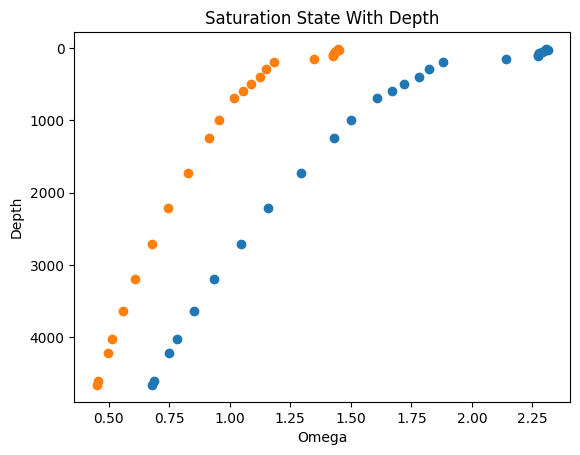

In [ ]:
# use CO2SYS to solve, but only pass the first 25 data points
# space for your calculation
# hint, reverse the yaxis direction with ax.invert_yaxis()

Glodap_First25=glodap.iloc[:25]


kwargs = dict(
    par1 = Glodap_First25.ALK,  # Value of the 1st param
    par2 = Glodap_First25.DIC,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 2,  # The 2nd param supplied is of type "2", which is "DIC" (uM)
    salinity = Glodap_First25.salinity,  # Salinity of the sample (ppt)
    temperature = Glodap_First25.temperature,  # Temperature at input conditions (celsius)
    pressure = Glodap_First25.depth, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)


plt.gca().invert_yaxis()
plt.scatter(results['saturation_calcite'],Glodap_First25.depth)

plt.scatter(results['saturation_aragonite'],Glodap_First25.depth)
plt.xlabel("Omega")
plt.ylabel("Depth")
plt.title("Saturation State With Depth")


#plt.legend(['Calcite','Aragonite'])



Saturation states generally have similar profiles, with higher values at the surface and lower values at depth. However, relative values can be significantly different as a function of where in the global ocean you look. Contrast the calcite saturation profiles given in the plots below. Why do the data from the North Pacific look so different from the North Atlantic?

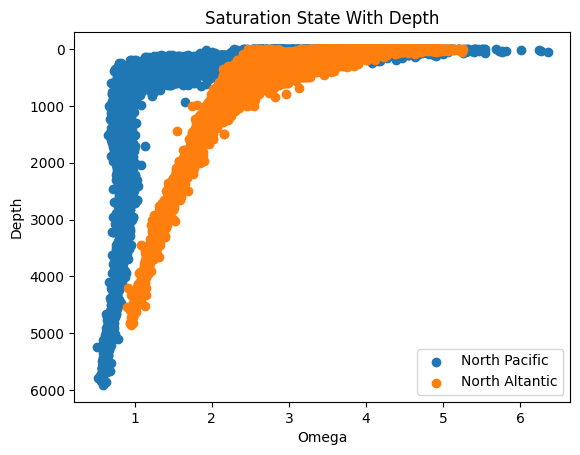

In [ ]:
NPacData = glodap[(glodap.latitude>30)& (glodap.latitude<50)& (glodap.longitude>-180) & (glodap.longitude<-130)] #is there not some and statement here to be used?


kwargs = dict(
    par1 = NPacData.ALK,  # Value of the 1st param
    par2 = NPacData.DIC,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 2,  # The 2nd param supplied is of type "2", which is "DIC" (uM)
    salinity = NPacData.salinity,  # Salinity of the sample (ppt)
    temperature = NPacData.temperature,  # Temperature at input conditions (celsius)
    pressure = NPacData.depth, #water pressure @ input conditions (dbar, which is ~meters)
)
results = pyco2.sys(**kwargs)

plt.gca().invert_yaxis()
plt.scatter(results['saturation_calcite'],NPacData.depth)
#-------------

NAtlData = glodap[(glodap.latitude>45)&(glodap.latitude<60)&(glodap.longitude>-40)&(glodap.longitude<-17)]


kwargs = dict(
    par1 = NAtlData.ALK,  # Value of the 1st param
    par2 = NAtlData.DIC,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 2,  # The 2nd param supplied is of type "2", which is "DIC" (uM)
    salinity = NAtlData.salinity,  # Salinity of the sample (ppt)
    temperature = NAtlData.temperature,  # Temperature at input conditions (celsius)
    pressure = NAtlData.depth, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)


plt.scatter(results['saturation_calcite'],NAtlData.depth)

plt.xlabel("Omega")
plt.ylabel("Depth")
plt.title("Saturation State With Depth")
plt.legend(['North Pacific','North Altantic'])
plt.show()


Now, using Pandas, pass only the glodap data from the deep Pacific Ocean (depth > 1500 m). Plot the relationship between the carbonate ion concentration and dissolved oxygen. Explain why you see the relationship you do.


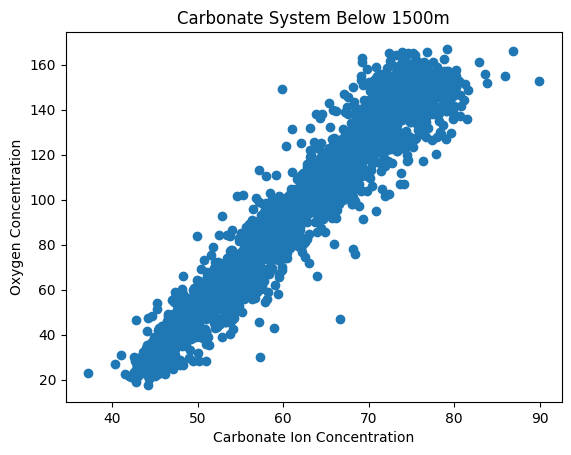

In [ ]:
# Space For Calculations

DepthData1500 = NPacData[(NPacData.depth>1500)]


kwargs = dict(
    par1 = DepthData1500.ALK,  # Value of the 1st param
    par2 = DepthData1500.DIC,  # Value of the 2nd param
    par1_type = 1,  # The 1st param supplied is of type "1", which is "ALK" (uM)
    par2_type = 2,  # The 2nd param supplied is of type "2", which is "DIC" (uM)
    salinity = DepthData1500.salinity,  # Salinity of the sample (ppt)
    temperature = DepthData1500.temperature,  # Temperature at input conditions (celsius)
    pressure = DepthData1500.depth, #water pressure @ input conditions (dbar, which is ~meters)

)
results = pyco2.sys(**kwargs)

plt.scatter(results['carbonate'],[DepthData1500.oxygen])

plt.xlabel("Carbonate Ion Concentration")
plt.ylabel("Oxygen Concentration")
plt.title("Carbonate System Below 1500m")
plt.show()


*Colab by Mark Torres and Allison Jacobel*